# Fitting Likelihood Distributions
The purpose of this notebook is to demonstrate how to estmiate the parameters of a probability distribution that best describes some observations.

This is useful for describing the generation of measurement errors.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy
from matplotlib import pyplot
import scipy.stats
import scipy.optimize

## Generating some example data
First we generate some observations, by drawing from the true distribution.

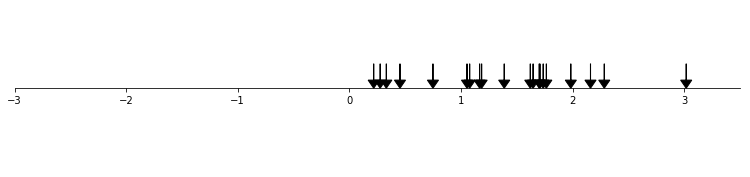

In [2]:
mu_true = 1.3
sigma_true = 0.8
N = 20

numpy.random.seed(2018)
samples = numpy.random.normal(loc=mu_true, scale=sigma_true, size=N)

fig, ax = pyplot.subplots(figsize=(13,3))
for s in samples:
    ax.arrow(x=s, y=0.3, dx=0, dy=-0.2, fc='black', head_width=0.1, head_length=0.1 )
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='minor', bottom=False)
pyplot.xlim(-3, 3.5)
pyplot.ylim(-1, 1)
pyplot.show()

## Fitting a distribution
For simplicity, we'll assume that the observations are normally distributed.

### Automatic Maximum-Likelihood fit

In [3]:
def compute_likelihoods(y_obs, mu, sigma):
    likelihoods = scipy.stats.norm.pdf(y_obs, loc=mu, scale=sigma)
    return likelihoods

def objective(theta):
    mu, sigma = theta
    likelihoods = compute_likelihoods(samples, mu, sigma)
    return -numpy.sum(numpy.log(likelihoods))

bounds = [
    (-3, 3),
    (0.5, 2)
]
fit = scipy.optimize.minimize(objective, x0=[1,1], bounds=bounds)
mu_fit, sigma_fit = fit.x
fit

      fun: 21.739951075570605
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 2.13162821e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 7
   status: 0
  success: True
        x: array([1.37677876, 0.71752968])

### Interactive Fit

In [4]:
def plot(mu, sigma):
    pyplot.figure(figsize=(8,5))
    
    x_dense = numpy.arange(-3, 3, 0.05)
    
    pdf_true = scipy.stats.norm.pdf(x_dense, loc=mu_true, scale=sigma_true)
    pdf_fit = scipy.stats.norm.pdf(x_dense, loc=mu_fit, scale=sigma_fit)
    pdf_manual = scipy.stats.norm.pdf(x_dense, loc=mu, scale=sigma)
    
    pyplot.plot(x_dense, pdf_true, color='black', linewidth=3, label='true distribution')
    pyplot.plot(x_dense, pdf_fit, color='green', linewidth=3, linestyle=':', label='maximum likelihood estimate')
    pyplot.plot(x_dense, pdf_manual, color='blue', linewidth=3, label='interactive fit')
    
    likelihoods = compute_likelihoods(y_obs=samples, mu=mu, sigma=sigma)
    obj = objective([mu, sigma])
    
    # plot lollipops for all individual likelihoods
    pyplot.scatter(samples, likelihoods, color='blue')
    pyplot.vlines(x=samples, ymin=0, ymax=likelihoods, color='blue', label='observations')
    
    # show the objective in the title
    pyplot.title(f'$\ell={obj:.4f}$')
    
    pyplot.legend()
    
    pyplot.show()
    return

In [5]:
w = interactive(plot,
                # tuples of (lower, uper, stepsize)
                mu=(-3, 3, 0.1),
                sigma=(0.5, 2, 0.1))

print('Move the sliders to minimize the objective (shown in the title).')
display(w)

Move the sliders to minimize the objective (shown in the title).


interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.2000000…